## Welcome to Day 11 - Homework!

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df = pd.read_csv('housepricesdata.csv')

Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.
2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 
3. Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda. 
4. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

### ANSWER

### Nomor 1

Membuat kolom baru bernama CleanedPrice berdasarkan informasi dari kolom 'Annual_Price' dan kolom 'Currency', sehingga harga sewa tahunan di CleanedPrice memiliki mata uang yang sama, yaitu IDR (Rupiah) dimana dugunakan asumsi 1 USD = 15 000 IDR.

In [122]:
df.head(3)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000


In [123]:
#Untuk mendapatkan jumlah nilai kolom USD dan IDR pada kumpulan data  kolom Currancy
df['Currency'].value_counts() 

IDR    5251
USD      52
Name: Currency, dtype: int64

In [124]:
df['CleanedPrice'] = df['Annual_Price'] #Mengisi nilai kolom CleanedPrice dengan Annual_Price
df.loc[df['Currency']=='USD', 'CleanedPrice']=df['Annual_Price']*15000 #convert nilai dari USD ke dalam IDR pada kolom CleanedPrice
#Pada kolom Annual_Price ada 52 dat yang masih dalam USD maka di CleanedPrice diubah ke dalam IDR, sehingga dikalikan 15000 (1 USD = 15000 IDR)
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000


### Nomor 2

Menganalisa kolom 'No_Rooms' dan 'CleanedPrice'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut?

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
 13  CleanedPrice      5303 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 580.1+ KB


In [126]:
df.isnull().sum()

Unit_Name           1
No_Rooms            0
Bathroom            0
Locality            0
Region              0
Longitude           0
Latitude            0
Furnished           0
Area                0
Tower               0
Total_Facilities    0
Currency            0
Annual_Price        0
CleanedPrice        0
dtype: int64

#### Mengecek Missing Value
- Dapat kita lihat dari df.info() bahwa kolom No_Rooms dan CleanedPrice tidak memiliki missing value (jika memiliki missing value, pasti dua kolom tersebut  tidak tertulis 5303 non-null)

- Data Type 'object' berarti kolom tersebut berisi 'string' (teks). Data type 'int64' berarti kolom tersebut berisi bilangan bulat, tanpa desimal. Selain itu, data type 'float64' berarti kolom tersebut berisi bilangan desimal. 

    Kolom No_Rooms dan CleanedPrice memiliki data type 'int64' yang sesuai yakni berisi bilangan bulat tanpa desimal sehingga data kita baik-baik saja.

- Dapat dilihat pada df.isnull().sum() bahwa pada No_Rooms dan CleanedPrice tidak ada missing value karena tidak ada data yang kosong.

#### Mengecek Outlier

####  No_Rooms

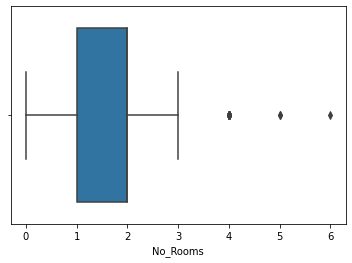

In [128]:
#Menggunakan Visualisasi
#Menggunakan Boxplot
sns.boxplot(data = df, x = 'No_Rooms')

Jika kita lihat ada titik-titik kecil yang berada di kisaran 4 sampai 6, mereka adalah outliers

In [129]:
# Menggunakan Z score
from scipy import stats
 
df[(np.abs(stats.zscore(df['No_Rooms']))) >= 2] #Mengetahui data-data mana yang outliers di No_Rooms.

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
544,Wesling Kedoya Apartment 4+1BR Non Furnished,4,3,Kedoya,Jakarta Barat,106.751800,-6.179500,0,264.0,Tower -,10,IDR,170000000,170000000
743,Casablanca Apartment 5BR Fully Furnished,5,4,Casablanca,Jakarta Selatan,106.845273,-6.222923,1,644.0,Tower -,24,IDR,702000000,702000000
793,Kemang Village Apartment 4+1BR Tower Cosmopolitan,4,4,Kemang,Jakarta Selatan,106.811453,-6.259374,1,240.0,Tower Cosmopolitan,22,IDR,456000000,456000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
1191,Ancol Mansion Apartment 4BR Semi Furnished,4,5,Ancol,Jakarta Utara,106.845853,-6.122102,0,160.0,Tower -,23,IDR,230000000,230000000
1550,Parama Apartment 4BR Non Furnished,4,2,TB Simatupang,Jakarta Selatan,106.787400,-6.291400,0,260.0,Tower -,3,IDR,260000000,260000000
1865,La Maison Barito Apartment 5+1BR View City,5,4,Kebayoran Baru,Jakarta Selatan,106.794400,-6.246300,1,296.0,Tower Apartement,16,IDR,763600000,763600000
2030,ST Moritz Apartment 4BR Fully Furnished,4,3,Puri Indah,Jakarta Barat,106.738730,-6.190723,1,259.0,Tower Ambassador,24,IDR,350000000,350000000
2411,Parama Apartment 4BR View city,4,2,TB Simatupang,Jakarta Selatan,106.787400,-6.291400,0,276.0,Tower -,3,IDR,290000000,290000000
2652,Mitra Oasis Residence 4+1BR Tower B,4,2,Senen,Jakarta Pusat,106.839511,-6.174313,1,209.0,Tower B,21,IDR,175650000,175650000


#### CleanedPrice

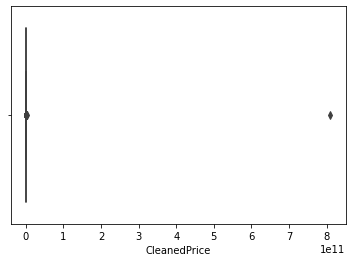

In [130]:
#Menggunakan Boxplot
sns.boxplot(data = df, x = 'CleanedPrice')

Jika kita lihat ada titik kecil yang berada di kisaran 8 merupakan outliers

In [131]:
# Menggunakan Z score
# Mengetahui data-data mana yang outliers di No_Rooms.
from scipy import stats
 
df[(np.abs(stats.zscore(df['CleanedPrice']))) >= 3] #Mengetahui data-data mana yang outliers di CleanedPrice.

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
1163,Signature Park Grande Studio Fully Furnished,0,1,MT Haryono,Jakarta Timur,106.866201,-6.245201,1,25.0,Tower Green Signature,20,USD,54000000,810000000000


In [132]:
# Headling Outlier
# Baris ke-1163 merupakan data yang sangat outlier maka drop baris ke-1663

df = df.drop(1163)

Kesimpulan:
- Pada kolom No_Rooms terdapat kejanggalan berupa 21 data yang outlier atau nilainya berbeda jauh dari data lainnya, namun tidak perlu dikhawatirkan atau diatasi sebab No_Rooms merupakan data jumlah bethroom sehingga sah-sah saja berapa jumlah bethroom pada apartemen.

- Pada kolom CleanedPrice terdapat kejanggalan berupa 1 data yang outlier yaitu pada baris 1163, maka baris 1163 kita hapuskan karena nilai CleanedPrice pada baris tersebut sangat jauh berbeda atau dapat mempengaruhi harga rata-rata apartemen di Jakarta Timur.

### Nomor 3

Apartemen di Kota/Kabupaten mana yang memiliki rata-rata harga paling tinggi? Buatlah visualisasi untuk mendukung klaim Anda.

In [133]:
#Untuk mengetaui rata-rata harga apartemen paling tinggi disebuah kota/Kabupaten 
df1 = pd.pivot_table(df, values = 'CleanedPrice', index = ['Region'], aggfunc = np.mean)
df1

,CleanedPrice
Region,
Bandung,6.551515e+07
Batam,7.200000e+07
Bekasi,4.401500e+07
Bogor,5.833333e+07
Depok,3.752500e+07
Jakarta Barat,7.317143e+07
Jakarta Pusat,1.057522e+08
Jakarta Selatan,1.758484e+08
Jakarta Timur,5.037366e+07


<Figure size 432x288 with 0 Axes>

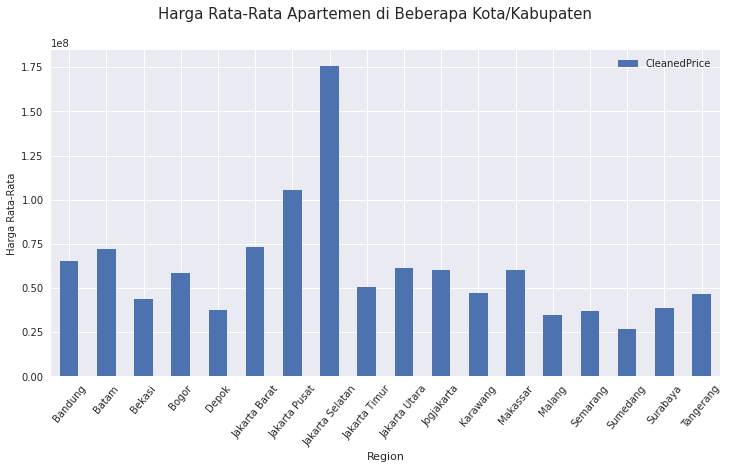

In [134]:
fig = plt.figure()

with plt.style.context('seaborn'):
  df1.plot(kind = 'bar', figsize = (12, 6))
  plt.xticks(rotation = 50, fontsize = 10)
  plt.ylabel('Harga Rata-Rata', fontsize = 10)
  plt.suptitle('Harga Rata-Rata Apartemen di Beberapa Kota/Kabupaten', fontsize = 15 )

plt.show()

Dari informasi diatas dapat disimpulkan bahwa apartemen di kota **Jakarta Selatan** memiliki rata-rata harga paling tinggi.

### Nomor 4

Menganalisa kolom 'Longitude' dan 'Latitude'. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Ada kejanggalan yang ***bisa dijelaskan***, sehingga data tersebut meskipun janggal tapi sah-sah saja, dan ada pula kejanggalan yang ***salah***, sehingga data tersebut harus diperbaiki. Kejanggalan tipe apa yang muncul di kolom 'Longitude' dan 'Latitude'? Bila kejanggalan tersebut bisa dijelaskan, maka jelaskanlah. Bila kejanggalan tersebut merupakan sebuah kesalahan, maka coba perbaikilah. 

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5302 entries, 0 to 5302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5301 non-null   object 
 1   No_Rooms          5302 non-null   int64  
 2   Bathroom          5302 non-null   int64  
 3   Locality          5302 non-null   object 
 4   Region            5302 non-null   object 
 5   Longitude         5302 non-null   float64
 6   Latitude          5302 non-null   float64
 7   Furnished         5302 non-null   int64  
 8   Area              5302 non-null   float64
 9   Tower             5302 non-null   object 
 10  Total_Facilities  5302 non-null   int64  
 11  Currency          5302 non-null   object 
 12  Annual_Price      5302 non-null   int64  
 13  CleanedPrice      5302 non-null   int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 621.3+ KB


In [136]:
df.isnull().sum()

Unit_Name           1
No_Rooms            0
Bathroom            0
Locality            0
Region              0
Longitude           0
Latitude            0
Furnished           0
Area                0
Tower               0
Total_Facilities    0
Currency            0
Annual_Price        0
CleanedPrice        0
dtype: int64

#### Mengecek Kejanggalan berupa Missing Value
- Untuk mengecek apakah ada kejanggalan dalam  kolom 'Longitude' dan 'Latitude' berupa missing value dapat dilihat dari df.info(), karena longitude dan latitude tertulis 5303 non-null seperti kolom-kolom lainnya maka tidak ada missing value dalam kolom tersebut.

- Dapat dilihat juga dalam df.info() bahwa data type kolom 'Longitude' dan 'Latitude' yaitu 'float64' yang berarti sesuai karena data 'Longitude' dan 'Latitude' berisi bilangan bulat dengan desimal.

- Dapat dilihat pada df.isnull().sum() bahwa pada kolom 'Longitude' dan 'Latitude'tidak ada missing value karena tidak ada data yang kosong.

#### Mengecek Kejangalan berupa Outlier
Untuk mengecek apakah ada kejanggalan dalam  kolom 'Longitude' dan 'Latitude' berupa outlier dapat dicek melalui visualisasi, z-score dan IQR

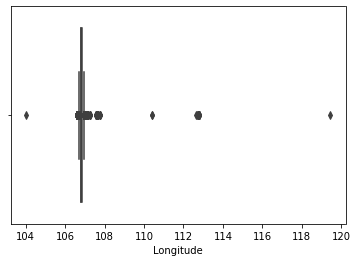

In [137]:
#Cek Outlier dengan Visualisasi
#Longitude
#Menggunakan Boxplot
sns.boxplot(data = df, x = 'Longitude')

Dapat dilihat pada boxplot 'Longitude' ada titik-titik kecil yang berada di 104 dan kisaran 110 sampai 120, itu merupakan outliers.

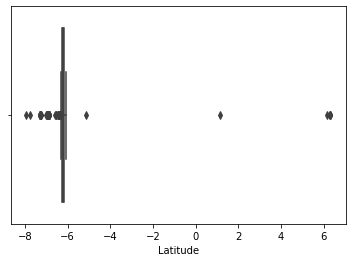

In [138]:
#Latitude
#Menggunakan Boxplot
sns.boxplot(data = df, x = 'Latitude')

Dapat dilihat pada boxplot 'Latitude' ada titik-titik kecil yang berada di -7, -5, dan kisaran 0 sampai 6, itu merupakan outliers.

In [139]:
#Cek Outlier dengan Z score
#Longitude
import scipy.stats as stats

df[(np.abs(stats.zscore(df['Longitude']))) >= 3] #Mengetahui data-data mana yang outliers di 'Longitude'

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
54,Puncak Kertajaya Apartment 2BR Non Furnished,2,1,Pakuwon City,Surabaya,112.787300,-7.287600,0,36.0,Tower A,11,IDR,23000000,23000000
246,Sejahtera Family Apartment 2BR Fully Furnished,2,1,Sleman,Jogjakarta,110.393900,-7.773700,1,45.0,Tower A,12,IDR,60000000,60000000
398,Twin Tower (River Peak) Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.748300,-7.251100,1,38.0,Tower A,13,IDR,50400000,50400000
456,Bale Hinggil Apartment Studio Tower A,0,1,Pakuwon City,Surabaya,112.781100,-7.309300,0,20.0,Tower A,9,IDR,20000000,20000000
733,Candiland Apartment 1BR Fully Furnished,1,1,Candisari,Semarang,110.417200,-7.000700,1,28.0,Tower 6,8,IDR,37000000,37000000
803,Soekarno Hatta Malang Apartment Studio Fully F...,0,1,Malang,Malang,112.616900,-7.949100,1,24.0,Tower 1,14,IDR,35000000,35000000
1415,Educity Residence Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.807241,-7.272173,1,21.0,Tower Yale,16,IDR,25000000,25000000
1441,Puncak Kertajaya Apartment 2BR Tower B,2,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,36.0,Tower B,15,IDR,35000000,35000000
1500,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.155050,1,42.0,Tower Ashton,17,IDR,60000000,60000000
1640,Puncak Kertajaya Apartment 1BR Fully Furnished,0,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,22.0,Tower A Selatan,14,IDR,25000000,25000000


Terdapat 18 data yang outlier atau janggal di kolom 'Longitude'.  

In [140]:
#Latitude

df[(np.abs(stats.zscore(df['Latitude']))) >= 3] #Mengetahui data-data mana yang outliers di 'Latitude'.

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
246,Sejahtera Family Apartment 2BR Fully Furnished,2,1,Sleman,Jogjakarta,110.393900,-7.773700,1,45.0,Tower A,12,IDR,60000000,60000000
803,Soekarno Hatta Malang Apartment Studio Fully F...,0,1,Malang,Malang,112.616900,-7.949100,1,24.0,Tower 1,14,IDR,35000000,35000000
826,Best Western Mangga Dua Studio View City,0,1,Mangga Dua,Jakarta Pusat,106.827261,6.139958,1,33.0,Tower 1,18,IDR,48000000,48000000
951,B Residence BSD 1BR Tower lotus,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower lotus,20,IDR,40000000,40000000
1140,B Residence BSD Studio Non Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,0,20.0,Tower Rose,17,IDR,40000000,40000000
1667,Nagoya Mansion Apartment Studio Tower B,0,1,Lubuk Baja,Batam,104.014900,1.143400,1,28.0,Tower B,12,IDR,72000000,72000000
2344,B Residence BSD Studio Fully Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,20,IDR,55000000,55000000
3143,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,25.0,Tower Tulip,18,IDR,55000000,55000000
3175,B Residence BSD Studio View AEON Mall,0,1,BSD City,Tangerang,106.638100,6.304300,1,22.0,Tower Tulip,18,IDR,45000000,45000000
4469,B Residence BSD Studio Furnished,0,1,BSD City,Tangerang,106.638100,6.304300,1,26.0,Tower Tulip,19,IDR,60000000,60000000



Terdapat 10 data yang outlier atau janggal di kolom 'Latitude'. 

#### Headling Outlier

- Outlier pada kolom 'Longitude' tidak perlu dihapus atau diganti nilainya, karena kejanggalan atau outliernya sah-sah saja.

- Outlier pada kolom Latitude ada yang sah-sah saja dan ada yang harus diperbaiki atau dihilangkan. Outlier atau kejanggalan yang sah-sah saja itu tidak perlu diperbaiki ada 3 data yaitu data yang terdapat pada baris 246, 803, dan 1667. Sedangkan outlier yang harus diperbiki yaitu ada 6 data yang berlokasi di kota Tangerang, nilai latitudenya salah yang harusnya bernilai -6.3043 tetapi didata nilainya 6.3043 serta karena nilai 6.3043 jauh dari nilai standar deviasi Region di Tangerang bagian Latitude menunjukkan nilai error yang cukup tinggi dan nilai max yang diluar batas dari Q3 maka data tersebut harus diperbaiki dengan mengubah nilainya dari 6.3043 menjadi -6.3043. Dan outlier yang harus dihilangkan terdapat pada baris 826 karena nilai standar deviasi Region Jakarta Pusat bagian Latitude menunjukkan nilai error yang cukup tinggi dan juga nilai max yang jauh diluar batas Q3, maka data pada baris 826 dihilangkan atau di drop.


In [145]:
#Menggati nilai outlier 6.3043 menjadi -6.3043 
df['Latitude'] = df['Latitude'].replace(6.3043, -6.3043) 

In [147]:
# Baris ke-826 merupakan data yang sangat outlier maka drop baris ke-826

df = df.drop(826)

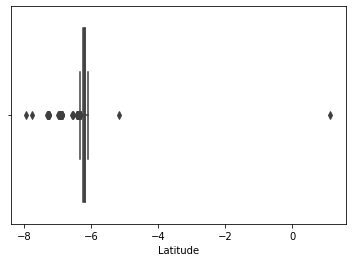

In [148]:
#Menggunakan Boxplot untuk mengecek apakah data outlier 6.3043 di 'Latitude' sudah diperbaiki dan apakah baris ke-826 telah di drop
sns.boxplot(data = df, x = 'Latitude')

Kejanggalan pada data 'Latitude' dikota Tangerang dan Jakarta Pusat telah diperbaiki dan diatasi sehingga didapatkan nilai standar yang semakin baik (mendekati 0) yang dapat dilihat pada interpterasi boxplot 'Latitude' diatas.